<a href="https://colab.research.google.com/github/asaadkhan21/Machine_Learning_With_Python/blob/main/Email_Spam_Detection_Using_ML_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Spam.csv')
target = 'spam'
labels = ['Ham','Spam']
original_df = df.copy(deep=True)
display(df.head())

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [4]:
display(df.describe())

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [5]:
#Removal of any Duplicate rows (if any)
counter = 0
r,c = original_df.shape
df1 = df.copy()
df1.drop_duplicates(inplace=True)
df1.reset_index(drop=True,inplace=True)
if df1.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped ---> {r-df1.shape[0]}')


Inference: Number of duplicates dropped ---> 391


In [6]:
df1.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [7]:
#Fixing the imbalance using SMOTE Technique
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
df5 = df1.copy()
print('Original class distribution:')
print(df5[target].value_counts())
xf = df5.columns
X = df5.drop([target],axis=1)
Y = df5[target]
smote = SMOTE()
X, Y = smote.fit_resample(X, Y)
df5 = pd.DataFrame(X, columns=xf)
df5[target] = Y
print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Original class distribution:
0    2531
1    1679
Name: spam, dtype: int64

Class distribution after applying SMOTE Technique:
1    2531
0    2531
Name: spam, dtype: int64


In [8]:
#Splitting the data intro training & testing sets
from sklearn.model_selection import train_test_split
df = df5.copy()
df.columns=[i.replace('[','_') for i in df.columns]
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)
print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (5062, 57) (5062,) 
Training set  --->  (4049, 57) (4049,) 
Testing set   --->  (1013, 57)  (1013,)


In [9]:
#Feature Scaling (Standardization)
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())
print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq__,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4.049000e+03,4.049000e+03,4.049000e+03,4049.000000,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,...,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03
mean,7.896869e-18,1.140659e-17,-7.019439e-18,0.000000,-2.105832e-17,-4.036178e-17,5.264579e-17,-2.193575e-18,4.562635e-17,-5.966523e-17,...,-8.774299e-18,2.149703e-17,1.140659e-17,-5.264579e-18,5.264579e-18,5.264579e-18,-1.754860e-17,2.193575e-17,8.774299e-18,-1.930346e-17
std,1.000124e+00,1.000124e+00,1.000124e+00,1.000124,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,...,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00
min,-3.764355e-01,-3.106836e-01,-6.206794e-01,-0.055488,-5.280613e-01,-3.828739e-01,-3.543008e-01,-2.927028e-01,-3.580465e-01,-4.084378e-01,...,-1.083137e-01,-1.624094e-01,-4.402564e-01,-1.853453e-01,-3.758855e-01,-3.630484e-01,-1.278604e-01,-1.509548e-01,-2.302277e-01,-4.812916e-01
25%,-3.764355e-01,-3.106836e-01,-6.206794e-01,-0.055488,-5.280613e-01,-3.828739e-01,-3.543008e-01,-2.927028e-01,-3.580465e-01,-4.084378e-01,...,-1.083137e-01,-1.624094e-01,-4.402564e-01,-1.853453e-01,-3.758855e-01,-3.630484e-01,-1.278604e-01,-1.285192e-01,-2.044915e-01,-4.148444e-01
50%,-3.764355e-01,-3.106836e-01,-6.206794e-01,-0.055488,-5.280613e-01,-3.828739e-01,-3.543008e-01,-2.927028e-01,-3.580465e-01,-4.084378e-01,...,-1.083137e-01,-1.624094e-01,-2.117882e-01,-1.853453e-01,-2.776782e-01,-3.630484e-01,-1.278604e-01,-1.042938e-01,-1.677254e-01,-3.100054e-01
75%,-1.630507e-01,-3.106836e-01,3.699069e-01,-0.055488,2.096465e-01,-2.034344e-01,-2.643457e-01,-2.927028e-01,-3.580465e-01,6.523503e-02,...,-1.083137e-01,-1.624094e-01,1.278267e-01,-1.853453e-01,1.024419e-01,4.119557e-02,-1.278604e-01,-5.133683e-02,-4.272089e-02,-1.468436e-02
max,1.523010e+01,2.492677e+01,9.689504e+00,29.736054,1.393680e+01,2.071922e+01,1.684537e+01,2.618225e+01,1.693036e+01,2.737018e+01,...,3.399623e+01,1.890010e+01,2.966815e+01,3.177608e+01,3.714856e+01,2.284529e+01,5.290223e+01,3.505252e+01,3.649170e+01,2.290814e+01



                                Standardardization on Testing set                                


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq__,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,...,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000
mean,0.009914,0.068467,0.047513,-0.008258,-0.021470,-0.006905,-0.038667,-0.019746,-0.053397,0.017667,...,-0.043070,-0.005448,-0.041211,-0.017758,-0.045056,-0.024616,0.051569,0.040816,-0.020414,-0.049256
std,1.006843,1.582156,1.061550,0.964220,0.867831,0.856429,0.883124,0.830077,0.806137,0.918987,...,0.568897,1.084056,0.571687,1.555611,0.564821,0.744871,1.485372,1.232896,0.541745,0.793142
min,-0.376435,-0.310684,-0.620679,-0.055488,-0.528061,-0.382874,-0.354301,-0.292703,-0.358047,-0.408438,...,-0.108314,-0.162409,-0.440256,-0.185345,-0.375886,-0.363048,-0.127860,-0.150955,-0.230228,-0.481292
25%,-0.376435,-0.310684,-0.620679,-0.055488,-0.528061,-0.382874,-0.354301,-0.292703,-0.358047,-0.408438,...,-0.108314,-0.162409,-0.440256,-0.185345,-0.375886,-0.363048,-0.127860,-0.128423,-0.204491,-0.420751
50%,-0.376435,-0.310684,-0.620679,-0.055488,-0.528061,-0.382874,-0.354301,-0.292703,-0.358047,-0.408438,...,-0.108314,-0.162409,-0.223001,-0.185345,-0.281144,-0.363048,-0.127860,-0.105604,-0.175079,-0.317388
75%,-0.172728,-0.310684,0.410339,-0.055488,0.224111,-0.095771,-0.354301,-0.292703,-0.358047,0.065235,...,-0.108314,-0.162409,0.121652,-0.185345,0.083956,0.051716,-0.127860,-0.058240,-0.053751,-0.007301
max,9.145612,37.545491,6.859258,27.900846,8.512476,7.153587,7.027127,8.357530,4.637844,7.628721,...,11.248499,18.978677,5.524616,46.784256,6.476918,7.516110,34.983948,21.134124,4.667009,12.939574


In [10]:
# Calculate the VIFs to remove multicollinearity
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report
Evaluation_Results = pd.DataFrame(np.zeros((7,4)), columns=['Accuracy', 'Precision','Recall','F1-score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)',
                         'K Nearest Neighbours (KNN)', 'Gradient Boosting (GB)','Extreme Gradient Boosting (XGB)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score
Logistic Regression (LR),0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0
K Nearest Neighbours (KNN),0.0,0.0,0.0,0.0
Gradient Boosting (GB),0.0,0.0,0.0,0.0
Extreme Gradient Boosting (XGB),0.0,0.0,0.0,0.0


In [11]:
#Let us define functions to summarise the Prediction's scores .
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
#Classification Summary Function
def Classification_Summary(pred,pred_prob,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(Test_Y, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(Test_Y, pred, average='weighted'),3)*100 #
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred, average='weighted'),3)*100)) #
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))
    



In [12]:
# Building Logistic Regression Classifier
from scipy.stats import loguniform
LR_model = LogisticRegression()
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
space = dict()
space['solver'] = ['newton-cg', 'liblinear'] # 'lbfgs',
space['penalty'] = ['l2'] #'none','l1','elasticnet'
space['C'] = loguniform(1e-5, 100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
RCV = RandomizedSearchCV(LR_model, space, n_iter=50, n_jobs=-1, cv=5, random_state=1)

LR = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = LR.predict(Test_X_std)
pred_prob = LR.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,0)

<<<----------------------------------- Evaluating Logistic Regression (LR) ----------------------------------->>>

Accuracy = 93.5%
F1 Score = 93.5%

 Confusiton Matrix:
 [[483  30]
 [ 36 464]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       513
           1       0.94      0.93      0.93       500

    accuracy                           0.93      1013
   macro avg       0.93      0.93      0.93      1013
weighted avg       0.93      0.93      0.93      1013



In [13]:
#Building Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier  
DT_model = DecisionTreeClassifier()
from sklearn import tree
from scipy.stats import randint
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
RCV = RandomizedSearchCV(DT_model, param_dist, n_iter=50, n_jobs=-1, cv=5, random_state=1)

DT = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = DT.predict(Test_X_std)
pred_prob = DT.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,1)

<<<----------------------------------- Evaluating Decision Tree Classifier (DT) ----------------------------------->>>

Accuracy = 90.10000000000001%
F1 Score = 90.10000000000001%

 Confusiton Matrix:
 [[460  53]
 [ 47 453]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       513
           1       0.90      0.91      0.90       500

    accuracy                           0.90      1013
   macro avg       0.90      0.90      0.90      1013
weighted avg       0.90      0.90      0.90      1013



In [14]:
# Building Random-Forest Classifier
RF_model = RandomForestClassifier()
param_dist={'bootstrap': [True, False],
            'max_depth': [10, 20, 50, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [50, 100]}
#RepeatedStratifiedKFold allows improving the estimated performance of a machine learning model, by simply repeating the 
#cross-validation procedure multiple times (according to the n_repeats value), and reporting the mean result 
#across all folds from all runs. This mean result is expected to be a more accurate estimate of the model's performance
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#this will train 100 models over 5 folds of cross validation (500 models total)
RCV = RandomizedSearchCV(RF_model, param_dist, n_iter=50, n_jobs=-1, cv=5, random_state=1)
RF = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = RF.predict(Test_X_std)
pred_prob = RF.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,2)

<<<----------------------------------- Evaluating Random Forest Classifier (RF) ----------------------------------->>>

Accuracy = 97.3%
F1 Score = 97.3%

 Confusiton Matrix:
 [[501  12]
 [ 15 485]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       513
           1       0.98      0.97      0.97       500

    accuracy                           0.97      1013
   macro avg       0.97      0.97      0.97      1013
weighted avg       0.97      0.97      0.97      1013



In [15]:
from sklearn.naive_bayes import BernoulliNB
NB_model = BernoulliNB()
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
RCV = RandomizedSearchCV(NB_model, params, n_iter=50, n_jobs=-1, cv=5, random_state=1)

NB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = NB.predict(Test_X_std)
pred_prob = NB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,3)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 5 is smaller than n_iter=50. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


<<<----------------------------------- Evaluating Naïve Bayes Classifier (NB) ----------------------------------->>>

Accuracy = 91.60000000000001%
F1 Score = 91.60000000000001%

 Confusiton Matrix:
 [[495  18]
 [ 67 433]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       513
           1       0.96      0.87      0.91       500

    accuracy                           0.92      1013
   macro avg       0.92      0.92      0.92      1013
weighted avg       0.92      0.92      0.92      1013



In [16]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
knn_param = {"n_neighbors": [i for i in range(1,30,5)],
             "weights": ["uniform", "distance"],
             "algorithm": ["ball_tree", "kd_tree", "brute"],
             "leaf_size": [1, 10, 30],
             "p": [1,2]}
#Repeated Stratified K-Fold cross validator. Repeats Stratified K-Fold n times with different randomization in each repetition. 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#this will train 100 models over 5 folds of cross validation (500 models total)
RCV = RandomizedSearchCV(KNN_model, knn_param, n_iter=50,  n_jobs=-1, cv=5, random_state=1)

KNN = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = KNN.predict(Test_X_std)
pred_prob = KNN.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,4)

<<<----------------------------------- Evaluating K Nearest Neighbours (KNN) ----------------------------------->>>

Accuracy = 93.7%
F1 Score = 93.7%

 Confusiton Matrix:
 [[485  28]
 [ 36 464]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       513
           1       0.94      0.93      0.94       500

    accuracy                           0.94      1013
   macro avg       0.94      0.94      0.94      1013
weighted avg       0.94      0.94      0.94      1013



In [17]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier().fit(Train_X_std, Train_Y)
param_dist = {
    "n_estimators":[5,20,100,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#RCV = RandomizedSearchCV(GB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

GB = GB_model.fit(Train_X_std, Train_Y)#.best_estimator_
pred = GB.predict(Test_X_std)
pred_prob = GB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,5)

<<<----------------------------------- Evaluating Gradient Boosting (GB) ----------------------------------->>>

Accuracy = 96.39999999999999%
F1 Score = 96.39999999999999%

 Confusiton Matrix:
 [[501  12]
 [ 24 476]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       513
           1       0.98      0.95      0.96       500

    accuracy                           0.96      1013
   macro avg       0.96      0.96      0.96      1013
weighted avg       0.96      0.96      0.96      1013



In [18]:
!pip install xgboost
from xgboost.sklearn import XGBClassifier
XGB_model = XGBClassifier()#.fit(Train_X_std, Train_Y, eval_metric='logloss')
param_dist = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#RCV = RandomizedSearchCV(XGB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

XGB = XGB_model.fit(Train_X_std, Train_Y, eval_metric='logloss')#.best_estimator_
pred = XGB.predict(Test_X_std)
pred_prob = XGB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,6)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
<<<----------------------------------- Evaluating Extreme Gradient Boosting (XGB) ----------------------------------->>>

Accuracy = 95.5%
F1 Score = 95.5%

 Confusiton Matrix:
 [[497  16]
 [ 30 470]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       513
           1       0.97      0.94      0.95       500

    accuracy                           0.95      1013
   macro avg       0.96      0.95      0.95      1013
weighted avg       0.95      0.95      0.95      1013



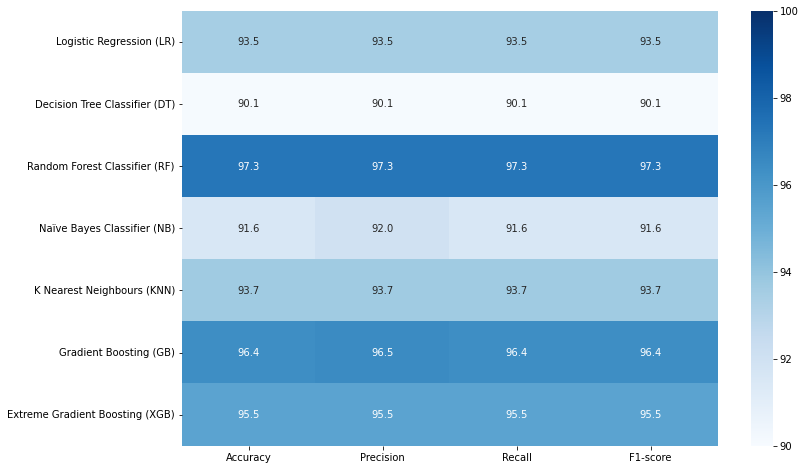

In [19]:
import seaborn as sns
plt.figure(figsize=[12,8])
sns.heatmap(Evaluation_Results, annot=True, vmin=90, vmax=100, cmap='Blues', fmt='.1f')
plt.show()